**导入相关模块**

In [1]:
import seaborn as sns
import pandas as pd
import sklearn.model_selection as skmodel
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.python.keras.utils.vis_utils import plot_model,model_to_dot

**读取数据**

In [2]:
excel_path='./二分类问题.xlsx'
pain_data = pd.read_excel(excel_path,usecols=[1,2,3,4,5,6,7,8]) 

**查看数据**

In [3]:
pain_data

,CLASS,PLT,CA125,Neutrophile,Neutrophile_Percentage,Lymphocyte,Lymphocyte_Percentage,Albumin
0,1,542,210.20,6.93,81.80,0.87,10.30,32.8
1,1,238,438.04,2.96,71.10,0.91,21.70,41.8
2,0,205,1072.00,3.47,65.50,1.28,24.10,35.8
3,1,263,7195.00,3.79,70.90,1.21,22.70,43.4
4,0,136,367.00,1.36,52.70,0.89,34.50,32.8
...,...,...,...,...,...,...,...,...
210,1,524,843.60,4.67,82.50,0.67,11.70,40.4
211,0,294,1262.00,6.60,71.70,1.88,20.40,45.0
212,0,338,31.77,4.13,59.24,2.21,31.64,42.6
213,1,403,775.80,5.76,86.21,0.56,8.42,30.6


**CLASS是标签，后7列是数据。将后7列提取出来**

In [4]:
PLT=pain_data.values[:,1].reshape(215,1)
CA125=pain_data.values[:,2].reshape(215,1)
Neutrophile=pain_data.values[:,3].reshape(215,1)
Neutrophile_Percentage=pain_data.values[:,4].reshape(215,1)
Lymphocyte=pain_data.values[:,5].reshape(215,1)
Lymphocyte_Percentage=pain_data.values[:,6].reshape(215,1)
Albumin=pain_data.values[:,7].reshape(215,1)
pain_data.data=np.hstack((PLT,CA125,Neutrophile,Neutrophile_Percentage,Lymphocyte,Lymphocyte_Percentage,Albumin))

C:\Users\Bunny\AppData\Local\Temp/ipykernel_4176/2773044780.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  pain_data.data=np.hstack((PLT,CA125,Neutrophile,Neutrophile_Percentage,Lymphocyte,Lymphocyte_Percentage,Albumin))


**查看数据**

In [5]:
pain_data.data

array([[5.4200e+02, 2.1020e+02, 6.9300e+00, ..., 8.7000e-01, 1.0300e+01,
        3.2800e+01],
       [2.3800e+02, 4.3804e+02, 2.9600e+00, ..., 9.1000e-01, 2.1700e+01,
        4.1800e+01],
       [2.0500e+02, 1.0720e+03, 3.4700e+00, ..., 1.2800e+00, 2.4100e+01,
        3.5800e+01],
       ...,
       [3.3800e+02, 3.1770e+01, 4.1300e+00, ..., 2.2100e+00, 3.1640e+01,
        4.2600e+01],
       [4.0300e+02, 7.7580e+02, 5.7600e+00, ..., 5.6000e-01, 8.4200e+00,
        3.0600e+01],
       [1.7200e+02, 7.9170e+02, 4.8800e+00, ..., 1.5500e+00, 2.2400e+01,
        4.3000e+01]])

**画出PLT、CA125、Neutrophile、Neutrophile_Percentage之间的散点图**

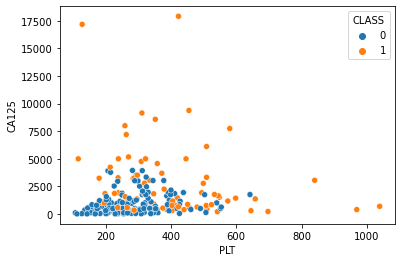

In [6]:
fig1=sns.scatterplot(x='PLT', y='CA125', data=pain_data, hue='CLASS')
scatter_fig1 = fig1.get_figure()
scatter_fig1.savefig('./pictures/PLT_CA125.jpg', dpi = 400)

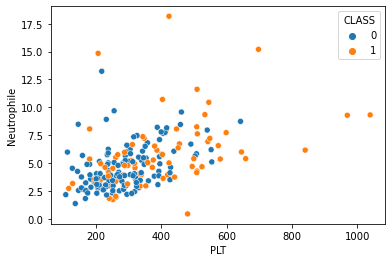

In [7]:
fig2=sns.scatterplot(x='PLT', y='Neutrophile', data=pain_data, hue='CLASS')
scatter_fig2 = fig2.get_figure()
scatter_fig2.savefig('./pictures/PLT_Neutrophile.jpg', dpi = 400)

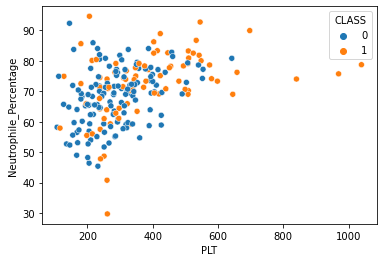

In [8]:
fig3=sns.scatterplot(x='PLT', y='Neutrophile_Percentage', data=pain_data, hue='CLASS')
scatter_fig3 = fig3.get_figure()
scatter_fig3.savefig('./pictures/PLT_Neutrophile_Percentage.jpg', dpi = 400)

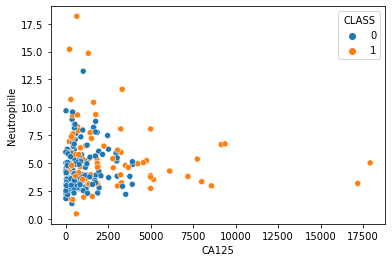

In [9]:
fig4=sns.scatterplot(x='CA125', y='Neutrophile', data=pain_data, hue='CLASS')
scatter_fig4 = fig4.get_figure()
scatter_fig4.savefig('./pictures/CA125_Neutrophile.jpg', dpi = 400)

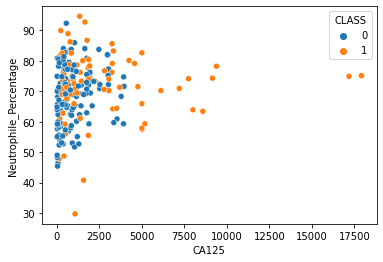

In [10]:
fig5=sns.scatterplot(x='CA125', y='Neutrophile_Percentage', data=pain_data, hue='CLASS')
scatter_fig5 = fig5.get_figure()
scatter_fig5.savefig('./pictures/CA125_Neutrophile_Percentage.jpg', dpi = 400)

**将数据进行归一化处理（归一化到0-1）并保存到“归一化后数据”的表格里**

In [11]:
std=MinMaxScaler()
std.fit(pain_data.data)
pain_data_minmax=std.transform(pain_data.data)
dataframe = pd.DataFrame({'CLASS':pain_data.values[:,0],'PLT':pain_data_minmax[:,0],'CA125':pain_data_minmax[:,1],'Neutrophile':pain_data_minmax[:,2],'Neutrophile_Percentage':pain_data_minmax[:,3],'Lymphocyte':pain_data_minmax[:,4],'Lymphocyte_Percentage':pain_data_minmax[:,5],'Albumin':pain_data_minmax[:,6]})
dataframe.to_csv("归一化后数据.csv",sep=',')

**查看归一化后的数据**

In [12]:
pain_data_minmax

array([[0.4667382 , 0.01128   , 0.36619718, ..., 0.14      , 0.1220375 ,
        0.61099366],
       [0.14055794, 0.02400295, 0.14253521, ..., 0.15142857, 0.32366466,
        0.8012685 ],
       [0.10515021, 0.05940428, 0.17126761, ..., 0.25714286, 0.36611249,
        0.6744186 ],
       ...,
       [0.24785408, 0.00131619, 0.2084507 , ..., 0.52285714, 0.4994694 ,
        0.81818182],
       [0.31759657, 0.042864  , 0.30028169, ..., 0.05142857, 0.0887867 ,
        0.56448203],
       [0.06974249, 0.04375188, 0.25070423, ..., 0.33428571, 0.33604528,
        0.82663848]])

**读取归一化后数据**

In [13]:
data = pd.read_csv('归一化后数据.csv')

**画出PLT、CA125、Neutrophile、Neutrophile_Percentage之间的归一化后数据的散点图**

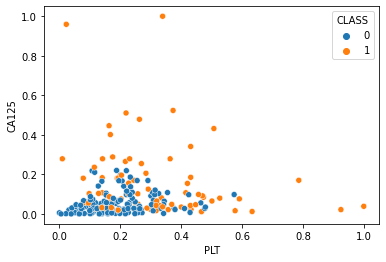

In [14]:
fig11=sns.scatterplot(x='PLT', y='CA125', data=data, hue='CLASS')
scatter_fig11 = fig11.get_figure()
scatter_fig11.savefig('./pictures/PLT_CA125_normalization.jpg', dpi = 400)

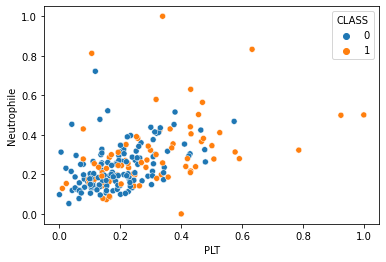

In [15]:
fig22=sns.scatterplot(x='PLT', y='Neutrophile', data=data, hue='CLASS')
scatter_fig22 = fig22.get_figure()
scatter_fig22.savefig('./pictures/PLT_Neutrophile_normalization.jpg', dpi = 400)

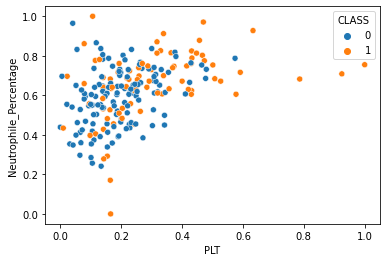

In [16]:
fig33=sns.scatterplot(x='PLT', y='Neutrophile_Percentage', data=data, hue='CLASS')
scatter_fig33 = fig33.get_figure()
scatter_fig33.savefig('./pictures/PLT_Neutrophile_Percentage_normalization.jpg', dpi = 400)

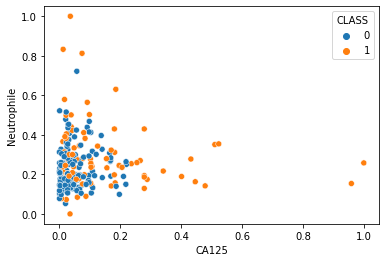

In [17]:
fig44=sns.scatterplot(x='CA125', y='Neutrophile', data=data, hue='CLASS')
scatter_fig44 = fig44.get_figure()
scatter_fig44.savefig('./pictures/CA125_Neutrophile_normalization.jpg', dpi = 400)

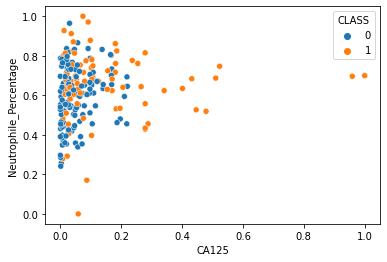

In [18]:
fig55=sns.scatterplot(x='CA125', y='Neutrophile_Percentage', data=data, hue='CLASS')
scatter_fig55 = fig55.get_figure()
scatter_fig55.savefig('./pictures/CA125_Neutrophile_Percentage_normalization.jpg', dpi = 400)

**将所有数据中随机选取80%进行训练**

In [19]:
x_train,_, y_train, _ = skmodel.train_test_split(pain_data_minmax, pain_data.CLASS,train_size=0.8)

**查看训练集数据和标签**

In [20]:
x_train

array([[0.28755365, 0.0295067 , 0.27267606, ..., 0.21142857, 0.23346304,
        0.77801268],
       [0.21995708, 0.0974324 , 0.19492958, ..., 0.43714286, 0.48638132,
        0.73784355],
       [0.35729614, 0.02163862, 0.18647887, ..., 0.21714286, 0.321896  ,
        0.51374207],
       ...,
       [0.30579399, 0.1087124 , 0.21577465, ..., 0.16285714, 0.22851079,
        0.5179704 ],
       [0.13948498, 0.00512347, 0.32732394, ..., 0.18857143, 0.17721967,
        0.78012685],
       [0.30042918, 0.09123399, 0.43830986, ..., 0.05714286, 0.04598514,
        0.63213531]])

In [21]:
y_train

64     1
21     0
140    1
27     0
6      1
      ..
149    1
73     1
67     0
136    0
8      0
Name: CLASS, Length: 172, dtype: int64

**定义评价指标**

In [22]:
#精确率评价指标
def metric_precision(y_true,y_pred): 
    TP=tf.reduce_sum(y_true*tf.round(y_pred))
    TN=tf.reduce_sum((1-y_true)*(1-tf.round(y_pred)))
    FP=tf.reduce_sum((1-y_true)*tf.round(y_pred))
    FN=tf.reduce_sum(y_true*(1-tf.round(y_pred)))
    precision=TP/(TP+FP)
    return precision
#召回率评价指标
def metric_recall(y_true,y_pred): 
    TP=tf.reduce_sum(y_true*tf.round(y_pred))
    TN=tf.reduce_sum((1-y_true)*(1-tf.round(y_pred)))
    FP=tf.reduce_sum((1-y_true)*tf.round(y_pred))
    FN=tf.reduce_sum(y_true*(1-tf.round(y_pred)))
    recall=TP/(TP+FN)
    return recall

#特异性评价指标
def metric_specificity(y_true,y_pred): 
    TN=tf.reduce_sum((1-y_true)*(1-tf.round(y_pred)))
    FP=tf.reduce_sum((1-y_true)*tf.round(y_pred))
    specificity=TN/(TN+FP)
    return specificity

#F1-score评价指标
def metric_F1score(y_true,y_pred): 
    TP=tf.reduce_sum(y_true*tf.round(y_pred))
    TN=tf.reduce_sum((1-y_true)*(1-tf.round(y_pred)))
    FP=tf.reduce_sum((1-y_true)*tf.round(y_pred))
    FN=tf.reduce_sum(y_true*(1-tf.round(y_pred)))
    precision=TP/(TP+FP)
    recall=TP/(TP+FN)
    F1score=2*precision*recall/(precision+recall)
    return F1score

**建立模型**

In [23]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(7,)))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

**模型的网络结构**

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 32)                4128      
                                                                 
 dense_4 (Dense)             (None, 8)                 264       
                                                                 
 dense_5 (Dense)             (None, 1)                 9

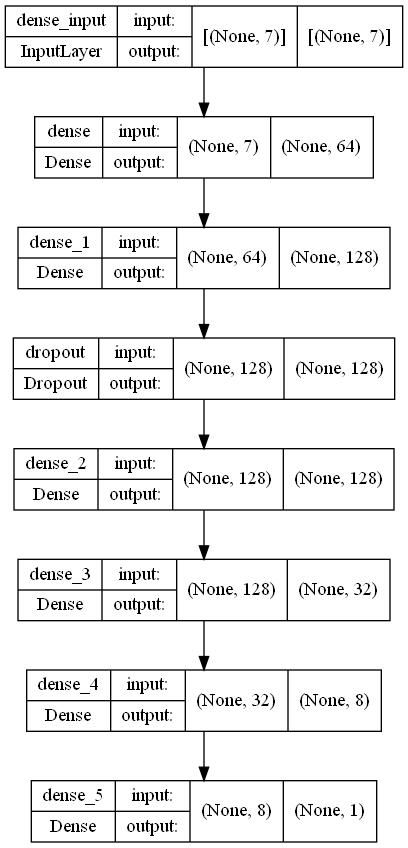

In [25]:
keras.utils.plot_model(model, to_file='./pictures/model.jpg', show_shapes=True)

**开始训练**

In [26]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy',
            metric_precision,
            metric_recall,
            metric_specificity,
            metric_F1score])
history=model.fit(x_train,y_train,epochs=1000,batch_size=64)

Epoch 1/1000
3/3 [==============================] - 1s 2ms/step - loss: 0.6935 - accuracy: 0.4826 - metric_precision: nan - metric_recall: 0.5144 - metric_specificity: 0.5037 - metric_F1score: nan      
Epoch 2/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.6829 - accuracy: 0.6163 - metric_precision: nan - metric_recall: 0.0392 - metric_specificity: 1.0000 - metric_F1score: nan  
Epoch 3/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.6692 - accuracy: 0.6337 - metric_precision: nan - metric_recall: 0.0870 - metric_specificity: 1.0000 - metric_F1score: nan
Epoch 4/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.6634 - accuracy: 0.6395 - metric_precision: 0.7289 - metric_recall: 0.3925 - metric_specificity: 0.8556 - metric_F1score: 0.4224
Epoch 5/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.6411 - accuracy: 0.6744 - metric_precision: 0.7680 - metric_recall: 0.3638 - metric_specificity: 0.8913 - metric_F1score: 0.

3/3 [==============================] - 0s 3ms/step - loss: 0.4815 - accuracy: 0.7500 - metric_precision: 0.7331 - metric_recall: 0.5981 - metric_specificity: 0.8612 - metric_F1score: 0.6514
Epoch 42/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.5190 - accuracy: 0.7674 - metric_precision: 0.8222 - metric_recall: 0.5460 - metric_specificity: 0.9180 - metric_F1score: 0.6424
Epoch 43/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4961 - accuracy: 0.7791 - metric_precision: 0.7111 - metric_recall: 0.6528 - metric_specificity: 0.8370 - metric_F1score: 0.6787
Epoch 44/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.5086 - accuracy: 0.7384 - metric_precision: 0.7746 - metric_recall: 0.5150 - metric_specificity: 0.8968 - metric_F1score: 0.6092
Epoch 45/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4836 - accuracy: 0.7849 - metric_precision: 0.8151 - metric_recall: 0.6394 - metric_specificity: 0.9004 - metric_F1score: 0

3/3 [==============================] - 0s 2ms/step - loss: 0.4758 - accuracy: 0.7733 - metric_precision: 0.7801 - metric_recall: 0.6221 - metric_specificity: 0.8889 - metric_F1score: 0.6759
Epoch 82/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.4581 - accuracy: 0.7849 - metric_precision: 0.8175 - metric_recall: 0.5906 - metric_specificity: 0.9079 - metric_F1score: 0.6767
Epoch 83/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4551 - accuracy: 0.7849 - metric_precision: 0.7700 - metric_recall: 0.6181 - metric_specificity: 0.8766 - metric_F1score: 0.6810
Epoch 84/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4477 - accuracy: 0.8140 - metric_precision: 0.8506 - metric_recall: 0.6523 - metric_specificity: 0.9225 - metric_F1score: 0.7356
Epoch 85/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4567 - accuracy: 0.8023 - metric_precision: 0.7964 - metric_recall: 0.6980 - metric_specificity: 0.8579 - metric_F1score: 0

3/3 [==============================] - 0s 2ms/step - loss: 0.4125 - accuracy: 0.8023 - metric_precision: 0.8023 - metric_recall: 0.6865 - metric_specificity: 0.8795 - metric_F1score: 0.7395
Epoch 122/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4082 - accuracy: 0.8081 - metric_precision: 0.8269 - metric_recall: 0.6637 - metric_specificity: 0.8982 - metric_F1score: 0.7299
Epoch 123/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4599 - accuracy: 0.7849 - metric_precision: 0.8003 - metric_recall: 0.6466 - metric_specificity: 0.8813 - metric_F1score: 0.7028
Epoch 124/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4130 - accuracy: 0.7965 - metric_precision: 0.7770 - metric_recall: 0.6746 - metric_specificity: 0.8743 - metric_F1score: 0.7196
Epoch 125/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4413 - accuracy: 0.7849 - metric_precision: 0.8351 - metric_recall: 0.6321 - metric_specificity: 0.8914 - metric_F1scor

3/3 [==============================] - 0s 2ms/step - loss: 0.3934 - accuracy: 0.8314 - metric_precision: 0.8892 - metric_recall: 0.6781 - metric_specificity: 0.9357 - metric_F1score: 0.7669
Epoch 162/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.4426 - accuracy: 0.7849 - metric_precision: 0.8445 - metric_recall: 0.6212 - metric_specificity: 0.9056 - metric_F1score: 0.6868
Epoch 163/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.4078 - accuracy: 0.8140 - metric_precision: 0.9048 - metric_recall: 0.6421 - metric_specificity: 0.9350 - metric_F1score: 0.7211
Epoch 164/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3850 - accuracy: 0.8314 - metric_precision: 0.8401 - metric_recall: 0.7103 - metric_specificity: 0.8947 - metric_F1score: 0.7644
Epoch 165/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3880 - accuracy: 0.8314 - metric_precision: 0.8411 - metric_recall: 0.7132 - metric_specificity: 0.8973 - metric_F1scor

3/3 [==============================] - 0s 2ms/step - loss: 0.3614 - accuracy: 0.8430 - metric_precision: 0.8526 - metric_recall: 0.7130 - metric_specificity: 0.9125 - metric_F1score: 0.7726
Epoch 202/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3831 - accuracy: 0.8140 - metric_precision: 0.9467 - metric_recall: 0.5930 - metric_specificity: 0.9658 - metric_F1score: 0.7009
Epoch 203/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3615 - accuracy: 0.8198 - metric_precision: 0.7857 - metric_recall: 0.7439 - metric_specificity: 0.8711 - metric_F1score: 0.7593
Epoch 204/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3489 - accuracy: 0.8140 - metric_precision: 0.8565 - metric_recall: 0.6626 - metric_specificity: 0.8938 - metric_F1score: 0.7410
Epoch 205/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3394 - accuracy: 0.8488 - metric_precision: 0.8925 - metric_recall: 0.7056 - metric_specificity: 0.9382 - metric_F1scor

3/3 [==============================] - 0s 2ms/step - loss: 0.3310 - accuracy: 0.8605 - metric_precision: 0.9348 - metric_recall: 0.7400 - metric_specificity: 0.9530 - metric_F1score: 0.8026
Epoch 242/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3227 - accuracy: 0.8547 - metric_precision: 0.9420 - metric_recall: 0.7030 - metric_specificity: 0.9667 - metric_F1score: 0.7986
Epoch 243/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3129 - accuracy: 0.8547 - metric_precision: 0.8984 - metric_recall: 0.7197 - metric_specificity: 0.9440 - metric_F1score: 0.7982
Epoch 244/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3142 - accuracy: 0.8663 - metric_precision: 0.9158 - metric_recall: 0.7394 - metric_specificity: 0.9517 - metric_F1score: 0.8140
Epoch 245/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.3016 - accuracy: 0.8605 - metric_precision: 0.8990 - metric_recall: 0.7450 - metric_specificity: 0.9432 - metric_F1scor

3/3 [==============================] - 0s 3ms/step - loss: 0.2710 - accuracy: 0.8837 - metric_precision: 0.9087 - metric_recall: 0.7792 - metric_specificity: 0.9514 - metric_F1score: 0.8352
Epoch 282/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.3521 - accuracy: 0.8372 - metric_precision: 0.9136 - metric_recall: 0.6951 - metric_specificity: 0.9444 - metric_F1score: 0.7655
Epoch 283/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.2974 - accuracy: 0.8721 - metric_precision: 0.9266 - metric_recall: 0.7538 - metric_specificity: 0.9557 - metric_F1score: 0.8296
Epoch 284/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2896 - accuracy: 0.8605 - metric_precision: 0.8743 - metric_recall: 0.7840 - metric_specificity: 0.9095 - metric_F1score: 0.8156
Epoch 285/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.2998 - accuracy: 0.8721 - metric_precision: 0.9540 - metric_recall: 0.7400 - metric_specificity: 0.9630 - metric_F1scor

3/3 [==============================] - 0s 2ms/step - loss: 0.2326 - accuracy: 0.9012 - metric_precision: 0.9129 - metric_recall: 0.8241 - metric_specificity: 0.9497 - metric_F1score: 0.8661
Epoch 322/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.2152 - accuracy: 0.9186 - metric_precision: 0.9230 - metric_recall: 0.8592 - metric_specificity: 0.9524 - metric_F1score: 0.8894
Epoch 323/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2334 - accuracy: 0.8953 - metric_precision: 0.9524 - metric_recall: 0.7936 - metric_specificity: 0.9649 - metric_F1score: 0.8578
Epoch 324/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.2921 - accuracy: 0.8314 - metric_precision: 0.8000 - metric_recall: 0.8312 - metric_specificity: 0.8520 - metric_F1score: 0.7896
Epoch 325/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2940 - accuracy: 0.8605 - metric_precision: 0.9444 - metric_recall: 0.6648 - metric_specificity: 0.9762 - metric_F1scor

3/3 [==============================] - 0s 2ms/step - loss: 0.2121 - accuracy: 0.9244 - metric_precision: 0.9191 - metric_recall: 0.8777 - metric_specificity: 0.9485 - metric_F1score: 0.8979
Epoch 362/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1988 - accuracy: 0.9244 - metric_precision: 0.9341 - metric_recall: 0.8557 - metric_specificity: 0.9650 - metric_F1score: 0.8911
Epoch 363/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2493 - accuracy: 0.8779 - metric_precision: 0.9076 - metric_recall: 0.7852 - metric_specificity: 0.9454 - metric_F1score: 0.8372
Epoch 364/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2524 - accuracy: 0.8663 - metric_precision: 0.8497 - metric_recall: 0.8362 - metric_specificity: 0.9018 - metric_F1score: 0.8306
Epoch 365/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.2156 - accuracy: 0.9244 - metric_precision: 0.9682 - metric_recall: 0.8406 - metric_specificity: 0.9763 - metric_F1scor

3/3 [==============================] - 0s 3ms/step - loss: 0.2435 - accuracy: 0.8837 - metric_precision: 0.9074 - metric_recall: 0.8100 - metric_specificity: 0.9444 - metric_F1score: 0.8423
Epoch 402/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2345 - accuracy: 0.8953 - metric_precision: 0.9215 - metric_recall: 0.8002 - metric_specificity: 0.9425 - metric_F1score: 0.8474
Epoch 403/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.2118 - accuracy: 0.9128 - metric_precision: 0.9247 - metric_recall: 0.8536 - metric_specificity: 0.9339 - metric_F1score: 0.8861
Epoch 404/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2062 - accuracy: 0.9244 - metric_precision: 0.9855 - metric_recall: 0.8338 - metric_specificity: 0.9910 - metric_F1score: 0.9010
Epoch 405/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.2270 - accuracy: 0.9070 - metric_precision: 0.9172 - metric_recall: 0.8517 - metric_specificity: 0.9525 - metric_F1scor

3/3 [==============================] - 0s 3ms/step - loss: 0.1868 - accuracy: 0.9186 - metric_precision: 0.9345 - metric_recall: 0.8586 - metric_specificity: 0.9602 - metric_F1score: 0.8931
Epoch 442/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1727 - accuracy: 0.9244 - metric_precision: 0.9841 - metric_recall: 0.8300 - metric_specificity: 0.9912 - metric_F1score: 0.9003
Epoch 443/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.2813 - accuracy: 0.8721 - metric_precision: 0.8814 - metric_recall: 0.8461 - metric_specificity: 0.9028 - metric_F1score: 0.8465
Epoch 444/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1906 - accuracy: 0.9244 - metric_precision: 0.9198 - metric_recall: 0.8770 - metric_specificity: 0.9569 - metric_F1score: 0.8938
Epoch 445/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1636 - accuracy: 0.9360 - metric_precision: 0.9487 - metric_recall: 0.9054 - metric_specificity: 0.9667 - metric_F1scor

3/3 [==============================] - 0s 2ms/step - loss: 0.1507 - accuracy: 0.9477 - metric_precision: 0.9877 - metric_recall: 0.8773 - metric_specificity: 0.9907 - metric_F1score: 0.9284
Epoch 482/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1839 - accuracy: 0.9070 - metric_precision: 0.8851 - metric_recall: 0.8897 - metric_specificity: 0.9113 - metric_F1score: 0.8823
Epoch 483/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1653 - accuracy: 0.9302 - metric_precision: 0.9316 - metric_recall: 0.8822 - metric_specificity: 0.9571 - metric_F1score: 0.9057
Epoch 484/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1740 - accuracy: 0.9535 - metric_precision: 0.9722 - metric_recall: 0.9082 - metric_specificity: 0.9837 - metric_F1score: 0.9373
Epoch 485/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.2302 - accuracy: 0.9070 - metric_precision: 0.8944 - metric_recall: 0.8596 - metric_specificity: 0.9154 - metric_F1scor

3/3 [==============================] - 0s 3ms/step - loss: 0.1253 - accuracy: 0.9535 - metric_precision: 0.9537 - metric_recall: 0.9325 - metric_specificity: 0.9701 - metric_F1score: 0.9415
Epoch 522/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1423 - accuracy: 0.9419 - metric_precision: 0.9833 - metric_recall: 0.8627 - metric_specificity: 0.9919 - metric_F1score: 0.9186
Epoch 523/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.2587 - accuracy: 0.9012 - metric_precision: 0.9057 - metric_recall: 0.8553 - metric_specificity: 0.9364 - metric_F1score: 0.8689
Epoch 524/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1294 - accuracy: 0.9477 - metric_precision: 0.9500 - metric_recall: 0.9310 - metric_specificity: 0.9709 - metric_F1score: 0.9371
Epoch 525/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1255 - accuracy: 0.9593 - metric_precision: 0.9363 - metric_recall: 0.9667 - metric_specificity: 0.9599 - metric_F1scor

3/3 [==============================] - 0s 2ms/step - loss: 0.1161 - accuracy: 0.9535 - metric_precision: 0.9533 - metric_recall: 0.9407 - metric_specificity: 0.9640 - metric_F1score: 0.9453
Epoch 562/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1013 - accuracy: 0.9651 - metric_precision: 0.9524 - metric_recall: 0.9522 - metric_specificity: 0.9600 - metric_F1score: 0.9508
Epoch 563/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1177 - accuracy: 0.9535 - metric_precision: 0.9848 - metric_recall: 0.8986 - metric_specificity: 0.9855 - metric_F1score: 0.9362
Epoch 564/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1157 - accuracy: 0.9593 - metric_precision: 0.9877 - metric_recall: 0.9142 - metric_specificity: 0.9907 - metric_F1score: 0.9490
Epoch 565/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0953 - accuracy: 0.9535 - metric_precision: 0.9429 - metric_recall: 0.9420 - metric_specificity: 0.9611 - metric_F1scor

3/3 [==============================] - 0s 2ms/step - loss: 0.1099 - accuracy: 0.9535 - metric_precision: 0.9625 - metric_recall: 0.9132 - metric_specificity: 0.9728 - metric_F1score: 0.9334
Epoch 602/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.1310 - accuracy: 0.9360 - metric_precision: 0.9160 - metric_recall: 0.9399 - metric_specificity: 0.9393 - metric_F1score: 0.9265
Epoch 603/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0728 - accuracy: 0.9767 - metric_precision: 0.9872 - metric_recall: 0.9501 - metric_specificity: 0.9915 - metric_F1score: 0.9673
Epoch 604/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1223 - accuracy: 0.9419 - metric_precision: 0.9006 - metric_recall: 0.9655 - metric_specificity: 0.9304 - metric_F1score: 0.9281
Epoch 605/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1421 - accuracy: 0.9593 - metric_precision: 0.9733 - metric_recall: 0.9444 - metric_specificity: 0.9837 - metric_F1scor

3/3 [==============================] - 0s 2ms/step - loss: 0.0798 - accuracy: 0.9709 - metric_precision: 0.9691 - metric_recall: 0.9615 - metric_specificity: 0.9789 - metric_F1score: 0.9638
Epoch 642/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0557 - accuracy: 0.9884 - metric_precision: 1.0000 - metric_recall: 0.9729 - metric_specificity: 1.0000 - metric_F1score: 0.9862
Epoch 643/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0774 - accuracy: 0.9826 - metric_precision: 1.0000 - metric_recall: 0.9625 - metric_specificity: 1.0000 - metric_F1score: 0.9806
Epoch 644/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0844 - accuracy: 0.9651 - metric_precision: 0.9702 - metric_recall: 0.9419 - metric_specificity: 0.9767 - metric_F1score: 0.9552
Epoch 645/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0843 - accuracy: 0.9767 - metric_precision: 0.9410 - metric_recall: 1.0000 - metric_specificity: 0.9577 - metric_F1scor

3/3 [==============================] - 0s 2ms/step - loss: 0.1260 - accuracy: 0.9477 - metric_precision: 0.9545 - metric_recall: 0.9159 - metric_specificity: 0.9773 - metric_F1score: 0.9327
Epoch 682/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0984 - accuracy: 0.9419 - metric_precision: 0.9405 - metric_recall: 0.9226 - metric_specificity: 0.9583 - metric_F1score: 0.9265
Epoch 683/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.1536 - accuracy: 0.9593 - metric_precision: 0.9417 - metric_recall: 0.9762 - metric_specificity: 0.9566 - metric_F1score: 0.9571
Epoch 684/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0505 - accuracy: 0.9884 - metric_precision: 1.0000 - metric_recall: 0.9742 - metric_specificity: 1.0000 - metric_F1score: 0.9868
Epoch 685/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0738 - accuracy: 0.9826 - metric_precision: 0.9753 - metric_recall: 0.9792 - metric_specificity: 0.9829 - metric_F1scor

3/3 [==============================] - 0s 2ms/step - loss: 0.0408 - accuracy: 0.9942 - metric_precision: 1.0000 - metric_recall: 0.9899 - metric_specificity: 1.0000 - metric_F1score: 0.9949
Epoch 722/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0437 - accuracy: 0.9884 - metric_precision: 0.9867 - metric_recall: 0.9867 - metric_specificity: 0.9915 - metric_F1score: 0.9867
Epoch 723/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0411 - accuracy: 0.9942 - metric_precision: 0.9872 - metric_recall: 1.0000 - metric_specificity: 0.9915 - metric_F1score: 0.9935
Epoch 724/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0603 - accuracy: 0.9767 - metric_precision: 0.9644 - metric_recall: 0.9667 - metric_specificity: 0.9802 - metric_F1score: 0.9653
Epoch 725/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1051 - accuracy: 0.9535 - metric_precision: 0.9630 - metric_recall: 0.9217 - metric_specificity: 0.9750 - metric_F1scor

3/3 [==============================] - 0s 3ms/step - loss: 0.0432 - accuracy: 0.9826 - metric_precision: 0.9648 - metric_recall: 0.9855 - metric_specificity: 0.9785 - metric_F1score: 0.9744
Epoch 762/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0290 - accuracy: 0.9942 - metric_precision: 1.0000 - metric_recall: 0.9804 - metric_specificity: 1.0000 - metric_F1score: 0.9899
Epoch 763/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.1045 - accuracy: 0.9767 - metric_precision: 0.9562 - metric_recall: 0.9881 - metric_specificity: 0.9700 - metric_F1score: 0.9717
Epoch 764/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0489 - accuracy: 0.9826 - metric_precision: 1.0000 - metric_recall: 0.9589 - metric_specificity: 1.0000 - metric_F1score: 0.9787
Epoch 765/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0271 - accuracy: 1.0000 - metric_precision: 1.0000 - metric_recall: 1.0000 - metric_specificity: 1.0000 - metric_F1scor

3/3 [==============================] - 0s 2ms/step - loss: 0.0575 - accuracy: 0.9884 - metric_precision: 0.9889 - metric_recall: 0.9804 - metric_specificity: 0.9905 - metric_F1score: 0.9842
Epoch 802/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0832 - accuracy: 0.9651 - metric_precision: 0.9688 - metric_recall: 0.9422 - metric_specificity: 0.9714 - metric_F1score: 0.9530
Epoch 803/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0331 - accuracy: 0.9942 - metric_precision: 0.9867 - metric_recall: 1.0000 - metric_specificity: 0.9917 - metric_F1score: 0.9932
Epoch 804/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.1004 - accuracy: 0.9593 - metric_precision: 0.9420 - metric_recall: 0.9630 - metric_specificity: 0.9704 - metric_F1score: 0.9486
Epoch 805/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0543 - accuracy: 0.9826 - metric_precision: 0.9877 - metric_recall: 0.9770 - metric_specificity: 0.9912 - metric_F1scor

3/3 [==============================] - 0s 2ms/step - loss: 0.1118 - accuracy: 0.9709 - metric_precision: 0.9655 - metric_recall: 0.9668 - metric_specificity: 0.9737 - metric_F1score: 0.9648
Epoch 842/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.1182 - accuracy: 0.9535 - metric_precision: 0.9383 - metric_recall: 0.9585 - metric_specificity: 0.9603 - metric_F1score: 0.9445
Epoch 843/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 0.9884 - metric_precision: 0.9896 - metric_recall: 0.9861 - metric_specificity: 0.9899 - metric_F1score: 0.9876
Epoch 844/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0258 - accuracy: 0.9942 - metric_precision: 1.0000 - metric_recall: 0.9855 - metric_specificity: 1.0000 - metric_F1score: 0.9926
Epoch 845/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0240 - accuracy: 0.9942 - metric_precision: 0.9861 - metric_recall: 1.0000 - metric_specificity: 0.9919 - metric_F1scor

3/3 [==============================] - 0s 2ms/step - loss: 0.0617 - accuracy: 0.9709 - metric_precision: 1.0000 - metric_recall: 0.9389 - metric_specificity: 1.0000 - metric_F1score: 0.9676
Epoch 882/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0141 - accuracy: 1.0000 - metric_precision: 1.0000 - metric_recall: 1.0000 - metric_specificity: 1.0000 - metric_F1score: 1.0000
Epoch 883/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0219 - accuracy: 0.9942 - metric_precision: 0.9867 - metric_recall: 1.0000 - metric_specificity: 0.9917 - metric_F1score: 0.9932
Epoch 884/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0138 - accuracy: 1.0000 - metric_precision: 1.0000 - metric_recall: 1.0000 - metric_specificity: 1.0000 - metric_F1score: 1.0000
Epoch 885/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0207 - accuracy: 0.9942 - metric_precision: 0.9825 - metric_recall: 1.0000 - metric_specificity: 0.9872 - metric_F1scor

3/3 [==============================] - 0s 2ms/step - loss: 0.0337 - accuracy: 0.9826 - metric_precision: 0.9885 - metric_recall: 0.9722 - metric_specificity: 0.9907 - metric_F1score: 0.9797
Epoch 922/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.0208 - accuracy: 1.0000 - metric_precision: 1.0000 - metric_recall: 1.0000 - metric_specificity: 1.0000 - metric_F1score: 1.0000
Epoch 923/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0394 - accuracy: 0.9826 - metric_precision: 0.9738 - metric_recall: 0.9861 - metric_specificity: 0.9829 - metric_F1score: 0.9798
Epoch 924/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0409 - accuracy: 0.9767 - metric_precision: 0.9889 - metric_recall: 0.9500 - metric_specificity: 0.9905 - metric_F1score: 0.9683
Epoch 925/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0427 - accuracy: 0.9767 - metric_precision: 0.9586 - metric_recall: 0.9867 - metric_specificity: 0.9696 - metric_F1scor

3/3 [==============================] - 0s 3ms/step - loss: 0.0323 - accuracy: 0.9942 - metric_precision: 0.9744 - metric_recall: 1.0000 - metric_specificity: 0.9896 - metric_F1score: 0.9867
Epoch 962/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.2068 - accuracy: 0.9477 - metric_precision: 0.9667 - metric_recall: 0.9075 - metric_specificity: 0.9730 - metric_F1score: 0.9326
Epoch 963/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0293 - accuracy: 0.9826 - metric_precision: 0.9638 - metric_recall: 1.0000 - metric_specificity: 0.9737 - metric_F1score: 0.9814
Epoch 964/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0220 - accuracy: 0.9942 - metric_precision: 1.0000 - metric_recall: 0.9861 - metric_specificity: 1.0000 - metric_F1score: 0.9929
Epoch 965/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0176 - accuracy: 0.9942 - metric_precision: 1.0000 - metric_recall: 0.9848 - metric_specificity: 1.0000 - metric_F1scor

**绘制训练过程中各评价指标和loss值的变化图像**

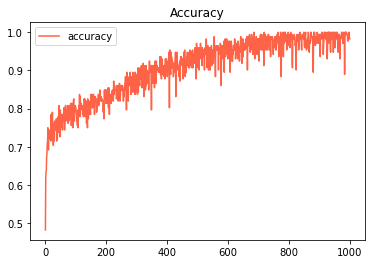

In [27]:
acc = history.history['accuracy']
epochs = range(1, len(acc) + 1)
plt.title('Accuracy')
plt.plot(epochs, acc, 'tomato', label='accuracy')
plt.legend()
plt.savefig('./pictures/Accuracy.jpg')
plt.show()

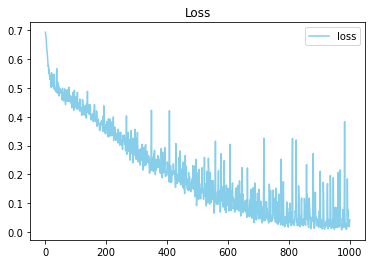

In [28]:
loss = history.history['loss']
plt.title('Loss')
plt.plot(epochs, loss, 'skyblue', label='loss')
plt.legend()
plt.savefig('./pictures/Loss.jpg')
plt.show()

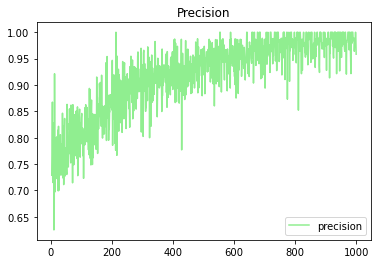

In [29]:
precision = history.history['metric_precision']
plt.title('Precision')
plt.plot(epochs, precision, 'lightgreen', label='precision')
plt.legend()
plt.savefig('./pictures/Precision.jpg')
plt.show()

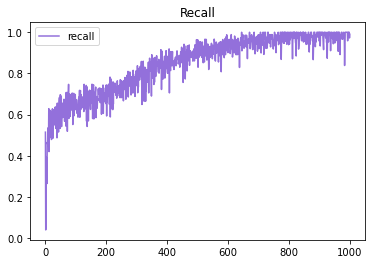

In [30]:
recall = history.history['metric_recall']
plt.title('Recall')
plt.plot(epochs, recall, 'mediumpurple', label='recall')
plt.legend()
plt.savefig('./pictures/Recall.jpg')
plt.show()

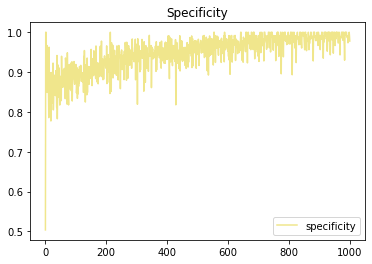

In [31]:
specificity = history.history['metric_specificity']
plt.title('Specificity')
plt.plot(epochs, specificity, 'khaki', label='specificity')
plt.legend()
plt.savefig('./pictures/Specificity.jpg')
plt.show()

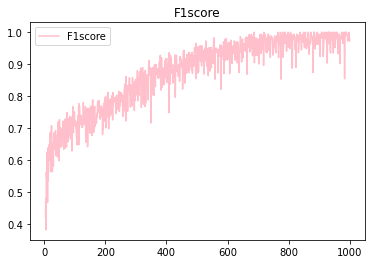

In [32]:
F1score = history.history['metric_F1score']
plt.title('F1score')
plt.plot(epochs, F1score, 'pink', label='F1score')
plt.legend()
plt.savefig('./pictures/F1score.jpg')
plt.show()

**每训练100次保存运行结果**

In [33]:
for i in range(99,1000):
    if (i+1)%100==0:
        print('loss:',round(history.history['loss'][i], 4))
for i in range(99,1000):
    if (i+1)%100==0:
        print('accuracy:',round(history.history['accuracy'][i], 4))
for i in range(99,1000):
    if (i+1)%100==0:
        print('precision:',round(history.history['metric_precision'][i], 4))
for i in range(99,1000):
    if (i+1)%100==0:
        print('recall:',round(history.history['metric_recall'][i],4))
for i in range(99,1000):
    if (i+1)%100==0:
        print('specificity:',round(history.history['metric_specificity'][i], 4))
for i in range(99,1000):
    if (i+1)%100==0:
        print('F1score:',round(history.history['metric_F1score'][i],4))

loss: 0.4448
loss: 0.3669
loss: 0.2711
loss: 0.217
loss: 0.1811
loss: 0.1514
loss: 0.0453
loss: 0.0667
loss: 0.0731
loss: 0.0436
accuracy: 0.8023
accuracy: 0.8488
accuracy: 0.8837
accuracy: 0.9012
accuracy: 0.936
accuracy: 0.9302
accuracy: 0.9826
accuracy: 0.9826
accuracy: 0.9709
accuracy: 0.9826
precision: 0.811
precision: 0.8832
precision: 0.9138
precision: 0.8915
precision: 0.947
precision: 0.9262
precision: 0.9867
precision: 0.9729
precision: 0.9744
precision: 0.9583
recall: 0.6521
recall: 0.7428
recall: 0.7955
recall: 0.8834
recall: 0.892
recall: 0.9008
recall: 0.97
recall: 0.9841
recall: 0.9568
recall: 0.9905
specificity: 0.8829
specificity: 0.9327
specificity: 0.9474
specificity: 0.9317
specificity: 0.9598
specificity: 0.9522
specificity: 0.9917
specificity: 0.9765
specificity: 0.9833
specificity: 0.9778
F1score: 0.7101
F1score: 0.7976
F1score: 0.8487
F1score: 0.8765
F1score: 0.915
F1score: 0.9132
F1score: 0.9778
F1score: 0.9781
F1score: 0.9643
F1score: 0.9729


**保存模型**

In [34]:
model.save('my_model_80%.h5')